In [57]:
# Course            : Data Mining
# First Name        : Samhita
# Last Name         : Chunduru
# Id                : 10479710
# Purpose           : Construct a CART Model on "UCI_heart_v3.CSV" dataset
# Assignment        : HW_Midterm_202411110 (Question 8)

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/version3/UCI_heart_V3.csv
/kaggle/input/midterm-v3/UCI_heart_V3.csv


In [59]:
# Load the data into a pandas dataframe
train_file_path = '/kaggle/input/version3/UCI_heart_V3.csv'  # Update this to the correct path
df_train = pd.read_csv(train_file_path)
print(df_train[df_train.isna().any(axis=1)])

Empty DataFrame
Columns: [sex, fbs, restecg, exang, Heart_problem, Age_Quantile]
Index: []


In [60]:
# Remove any rows with missing values
print(df_train.shape)
print(df_train.isnull().sum())
print()
df_train.dropna(inplace=True)
print(f"shape : {df_train.shape}")
print(df_train.isnull().sum())

(30, 6)
sex              0
fbs              0
restecg          0
exang            0
Heart_problem    0
Age_Quantile     0
dtype: int64

shape : (30, 6)
sex              0
fbs              0
restecg          0
exang            0
Heart_problem    0
Age_Quantile     0
dtype: int64


In [61]:
print(df_train.dtypes)
df_train.head()

sex               int64
fbs               int64
restecg           int64
exang             int64
Heart_problem     int64
Age_Quantile     object
dtype: object


,sex,fbs,restecg,exang,Heart_problem,Age_Quantile
0,1,0,0,0,0,Q1
1,1,0,0,0,0,Q1
2,1,0,2,0,1,Q3
3,1,0,0,0,0,Q3
4,1,1,0,0,0,Q3


In [62]:
# Convert categorical 'Age_Quantile' to numerical values 
age_quantile_mapping = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4} 
df_train['Age_Quantile'] = df_train['Age_Quantile'].map(age_quantile_mapping)

In [63]:
# Select relevant attributes and target for training data 
attr_train = df_train[['sex', 'fbs', 'restecg', 'exang', 'Age_Quantile']] 
target_train = df_train['Heart_problem']

In [64]:
# Initialize and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(attr_train, target_train)

DecisionTreeClassifier(random_state=42)

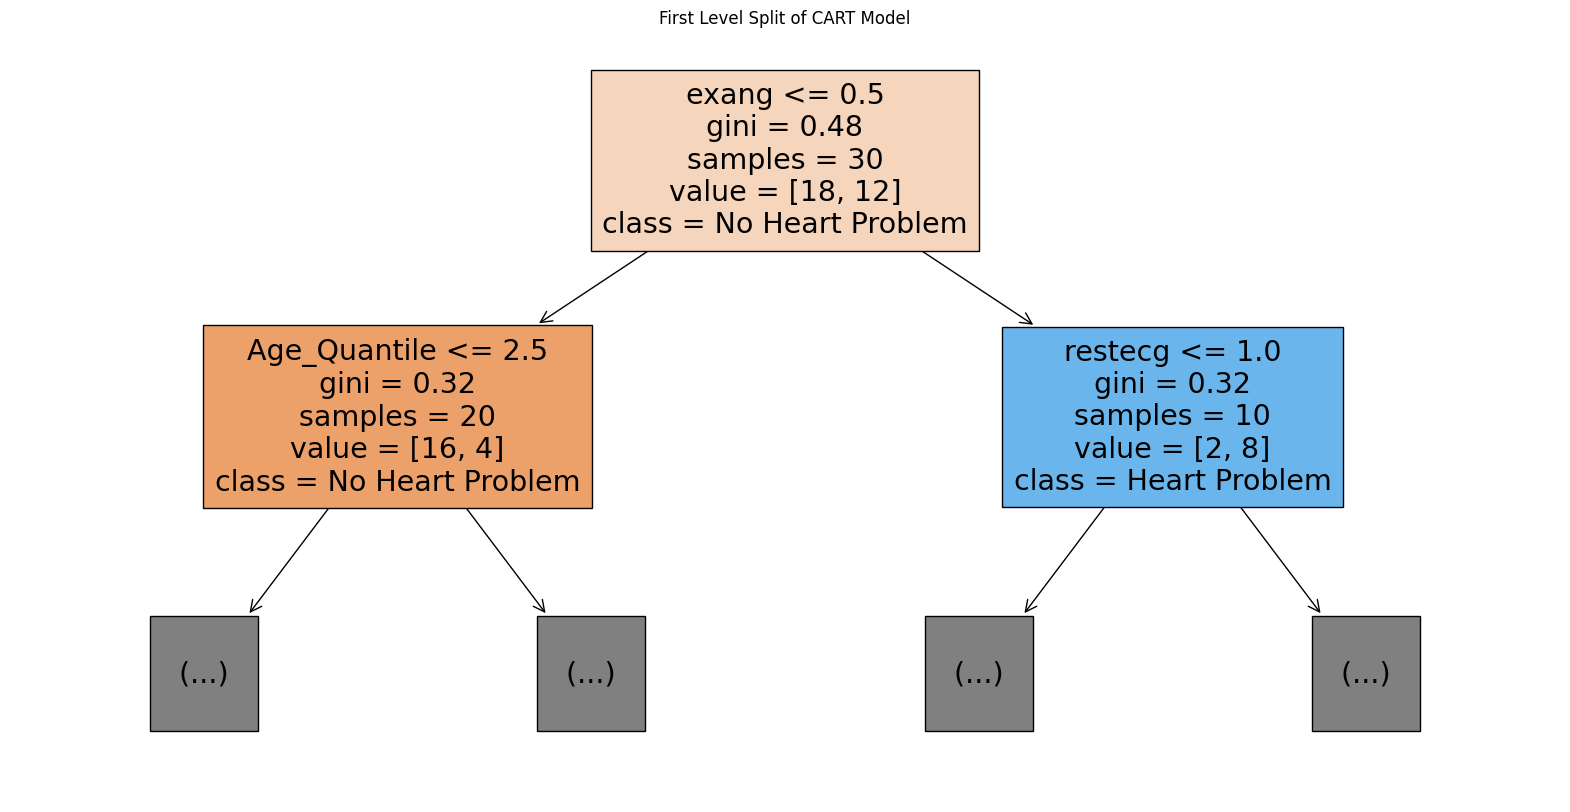

In [65]:
# Plot the decision tree to visualize the first level split
plt.figure(figsize=(20, 10))
plot_tree(model, max_depth=1, filled=True, feature_names=attr_train.columns, class_names=["No Heart Problem", "Heart Problem"])
plt.title("First Level Split of CART Model")
plt.show()